In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
 insurance_datset = pd.read_csv("insurance.csv")

In [3]:
insurance_datset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_datset.shape

(1338, 7)

In [5]:
insurance_datset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking the missing values
insurance_datset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#checking the statistics of dataset.
insurance_datset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x432 with 0 Axes>

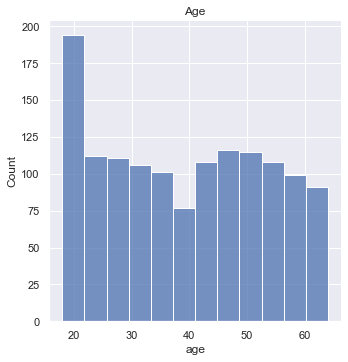

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_datset['age'])
plt.title("Age")
plt.show()

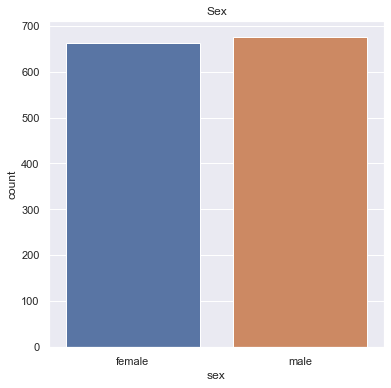

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x ='sex', data=insurance_datset)
plt.title("Sex")
plt.show()

<Figure size 432x432 with 0 Axes>

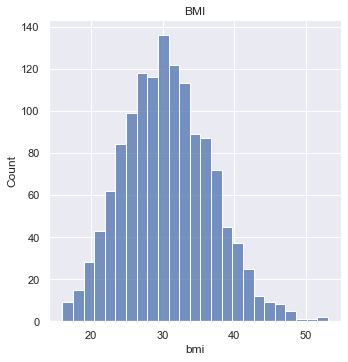

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_datset['bmi'])
plt.title("BMI")
plt.show()

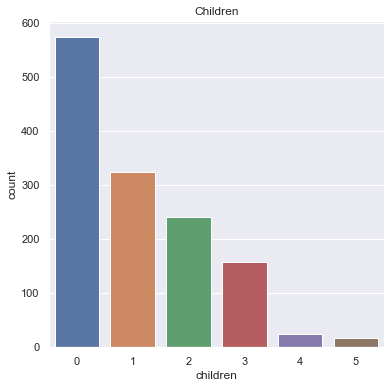

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x ='children', data=insurance_datset)
plt.title("Children")
plt.show()

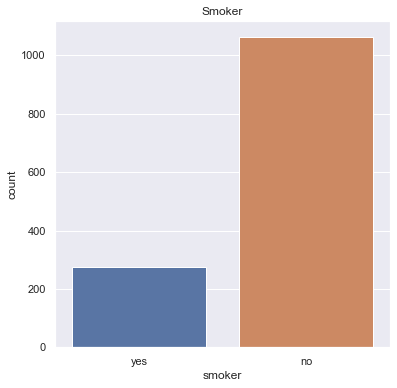

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x ='smoker', data=insurance_datset)
plt.title("Smoker")
plt.show()

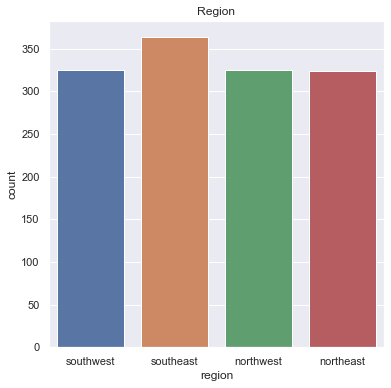

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x ='region', data=insurance_datset)
plt.title("Region")
plt.show()

<Figure size 432x432 with 0 Axes>

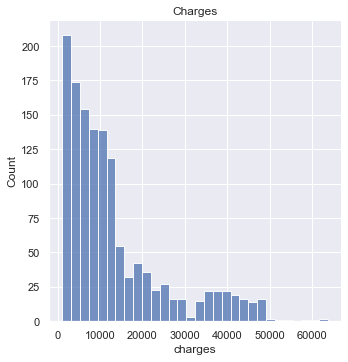

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_datset['charges'])
plt.title("Charges")
plt.show()

In [15]:
insurance_datset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
insurance_datset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
insurance_datset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
insurance_datset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
#encoding the categorical features : sex, region, and smoker
insurance_datset.replace({'sex':{'male': 0,'female': 1}}, inplace=True)
insurance_datset.replace({'smoker':{'yes': 0,'no': 1}}, inplace=True)
insurance_datset.replace({'region':{'southeast':0,'southwest': 1, 'northwest':2, 'northeast':3}}, inplace=True)


In [20]:
#spliting the features and target
x = insurance_datset.drop(columns='charges', axis=1)
y = insurance_datset['charges']

In [21]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [24]:
x_scaler

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.40287427],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.28800691],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.28800691],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.28800691],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.40287427],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         0.48225837]])

In [33]:
x_train = scaler.fit_transform(x_train)


In [68]:
#Splitting the data into traning and testing data
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [69]:
print(x.shape, x_train.shape, y_train.shape)

(1338, 6) (1070, 6) (1070,)


In [70]:
reg = LinearRegression()


In [71]:
reg.fit(x_train, y_train)

LinearRegression()

Model Evaluation 

In [72]:
#predication for train data
training_data_predicaiton = reg.predict(x_train)

In [73]:
r2_train = metrics.r2_score(y_train, training_data_predicaiton)
r2_train

0.7518195459072954

In [74]:
#predication for test data

training_data_predicaiton = reg.predict(x_test)

In [75]:
r2_test = metrics.r2_score(y_test, training_data_predicaiton)
r2_test

0.7454471618659975

Building a predicative system

In [84]:
input_data= (37,0,29.83,2,1,3)

In [85]:
input_as_numpy= np.asarray(input_data)

In [86]:
input_data_reshaped= input_as_numpy.reshape(1,-1)

In [88]:
predication= reg.predict(input_data_reshaped)
print("The insurance cost is", predication[0])

The insurance cost is 8506.005394472342
